# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of ridge and lasso regression!

## Objectives

In this lab you will: 

- Use lasso and ridge regression with scikit-learn 
- Compare and contrast lasso, ridge and non-regularized regression 

## Housing Prices Data

We'll use this version of the Ames Housing dataset: 

In [1]:
# Run this cell without changes
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('housing_prices.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

More information about the features is available in the `data_description.txt` file in this repository.

## Data Preparation

The code below:

* Separates the data into `X` (predictor) and `y` (target) variables
* Splits the data into 75-25 training-test sets, with a `random_state` of 10
* Separates each of the `X` values into continuous vs. categorical features
* Fills in missing values (using different strategies for continuous vs. categorical features)
* Scales continuous features to a range of 0 to 1
* Dummy encodes categorical features
* Combines the preprocessed continuous and categorical features back together

In [2]:
# Run this cell without changes
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create X and y
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Separate X data into continuous vs. categorical
X_train_cont = X_train.select_dtypes(include='number')
X_test_cont = X_test.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Impute missing values using SimpleImputer, median for continuous and
# filling in 'missing' for categorical
impute_cont = SimpleImputer(strategy='median')
X_train_cont = impute_cont.fit_transform(X_train_cont)
X_test_cont = impute_cont.transform(X_test_cont)
impute_cat = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = impute_cat.fit_transform(X_train_cat)
X_test_cat = impute_cat.transform(X_test_cat)

# Scale continuous values using MinMaxScaler
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# Dummy encode categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

# Combine everything back together
X_train_preprocessed = np.asarray(np.concatenate([X_train_cont, X_train_cat.todense()], axis=1))
X_test_preprocessed = np.asarray(np.concatenate([X_test_cont, X_test_cat.todense()], axis=1))

## Linear Regression Model

Let's use this data to build a first naive linear regression model. Fit the model on the training data (`X_train_preprocessed`), then compute the R-Squared and the MSE for both the training and test sets.

In [3]:
# Replace None with appropriate code
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train_preprocessed, y_train)

# Print R2 and MSE for training and test sets
train_r2 = linreg.score(X_train_preprocessed, y_train)
test_r2 = linreg.score(X_test_preprocessed, y_test)
train_mse = mean_squared_error(y_train, linreg.predict(X_train_preprocessed))
test_mse = mean_squared_error(y_test, linreg.predict(X_test_preprocessed))

print(f"\n Linear Regression Performance:")
print(f" Training R²: {train_r2:.4f} | Training MSE: {train_mse:.2f}")
print(f" Test R²: {test_r2:.4f} | Test MSE: {test_mse:.2f}")



 Linear Regression Performance:
 Training R²: 0.9358 | Training MSE: 403055499.21
 Test R²: -1562900991571131648.0000 | Test MSE: 9971597633833244963219963904.00


Notice the severe overfitting above; our training R-Squared is very high, but the test R-Squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso Regression

Use all the data (scaled features and dummy categorical variables, `X_train_preprocessed`) to build some models with regularization - two each for lasso and ridge regression. Each time, look at R-Squared and MSE.

Remember that you can use the scikit-learn documentation if you don't remember how to import or use these classes:

* [`Lasso` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [`Ridge` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Lasso

#### With default hyperparameters (`alpha` = 1)

In [4]:
# Your code here
# Train Lasso Regression (Alpha = 1)
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train_preprocessed, y_train)

# Compute R² and MSE
train_r2_lasso = lasso.score(X_train_preprocessed, y_train)
test_r2_lasso = lasso.score(X_test_preprocessed, y_test)
train_mse_lasso = mean_squared_error(y_train, lasso.predict(X_train_preprocessed))
test_mse_lasso = mean_squared_error(y_test, lasso.predict(X_test_preprocessed))

# Print results
print(f"\n Lasso Regression Performance (Alpha = 1):")
print(f" Training R²: {train_r2_lasso:.4f} | Training MSE: {train_mse_lasso:.2f}")
print(f" Test R²: {test_r2_lasso:.4f} | Test MSE: {test_mse_lasso:.2f}")



 Lasso Regression Performance (Alpha = 1):
 Training R²: 0.9358 | Training MSE: 403443180.27
 Test R²: 0.8896 | Test MSE: 704367122.41


#### With a higher regularization hyperparameter (`alpha` = 10)

In [5]:
# Your code here
# Train Lasso Regression (Alpha = 10)
lasso_10 = Lasso(alpha=10)
lasso_10.fit(X_train_preprocessed, y_train)

# Compute R² and MSE for Alpha=10
train_r2_lasso10 = lasso_10.score(X_train_preprocessed, y_train)
test_r2_lasso10 = lasso_10.score(X_test_preprocessed, y_test)
train_mse_lasso10 = mean_squared_error(y_train, lasso_10.predict(X_train_preprocessed))
test_mse_lasso10 = mean_squared_error(y_test, lasso_10.predict(X_test_preprocessed))

# Print results
print(f"\n Lasso Regression Performance (Alpha = 10):")
print(f" Training R²: {train_r2_lasso10:.4f} | Training MSE: {train_mse_lasso10:.2f}")
print(f" Test R²: {test_r2_lasso10:.4f} | Test MSE: {test_mse_lasso10:.2f}")



 Lasso Regression Performance (Alpha = 10):
 Training R²: 0.9340 | Training MSE: 414404517.19
 Test R²: 0.8981 | Test MSE: 650157273.49


## Ridge

#### With default hyperparameters (`alpha` = 1)

In [6]:
# Your code here
# Train Ridge Regression (Alpha = 1)
from sklearn.linear_model import Ridge

ridge_1 = Ridge(alpha=1)
ridge_1.fit(X_train_preprocessed, y_train)

# Compute R² and MSE for Alpha=1
train_r2_ridge1 = ridge_1.score(X_train_preprocessed, y_train)
test_r2_ridge1 = ridge_1.score(X_test_preprocessed, y_test)
train_mse_ridge1 = mean_squared_error(y_train, ridge_1.predict(X_train_preprocessed))
test_mse_ridge1 = mean_squared_error(y_test, ridge_1.predict(X_test_preprocessed))

# Print results
print(f"\n Ridge Regression Performance (Alpha = 1):")
print(f" Training R²: {train_r2_ridge1:.4f} | Training MSE: {train_mse_ridge1:.2f}")
print(f" Test R²: {test_r2_ridge1:.4f} | Test MSE: {test_mse_ridge1:.2f}")





 Ridge Regression Performance (Alpha = 1):
 Training R²: 0.9208 | Training MSE: 497616506.07
 Test R²: 0.8864 | Test MSE: 724504516.46


#### With higher regularization hyperparameter (`alpha` = 10)

In [7]:
# Your code here
# Train Ridge Regression (Alpha = 10)
ridge_10 = Ridge(alpha=10)
ridge_10.fit(X_train_preprocessed, y_train)

# Compute R² and MSE for Alpha=10
train_r2_ridge10 = ridge_10.score(X_train_preprocessed, y_train)
test_r2_ridge10 = ridge_10.score(X_test_preprocessed, y_test)
train_mse_ridge10 = mean_squared_error(y_train, ridge_10.predict(X_train_preprocessed))
test_mse_ridge10 = mean_squared_error(y_test, ridge_10.predict(X_test_preprocessed))

# Print results
print(f"\n Ridge Regression Performance (Alpha = 10):")
print(f" Training R²: {train_r2_ridge10:.4f} | Training MSE: {train_mse_ridge10:.2f}")
print(f" Test R²: {test_r2_ridge10:.4f} | Test MSE: {test_mse_ridge10:.2f}")


 Ridge Regression Performance (Alpha = 10):
 Training R²: 0.8889 | Training MSE: 697520321.00
 Test R²: 0.8795 | Test MSE: 768710500.29


## Comparing the Metrics    

Which model seems best, based on the metrics?

# Write your conclusions here:
##  Comparing the Metrics - Answer

### 1️⃣ Linear Regression:
#### - Training R² is very high, indicating overfitting.
#### - Test R² is much lower or negative, showing poor generalization.
#### - Test MSE is significantly higher than Training MSE, confirming overfitting.

### 2️⃣ Lasso Regression:
#### - As alpha increases, Lasso forces more coefficients to zero, performing feature selection.
#### - With alpha = 1, some overfitting remains but improves over Linear Regression.
#### - With alpha = 10, many coefficients are near zero, increasing bias but improving generalization.

### 3️⃣ Ridge Regression:
#### - Ridge reduces model complexity but retains all features.
#### - With alpha = 1, Ridge generalizes better than Linear Regression but still overfits slightly.
#### - With alpha = 10, Ridge reduces overfitting significantly without eliminating features.

###  Best Model Choice:
#### - The best model depends on the bias-variance trade-off.
#### - Lasso (α = 10) has the lowest test MSE, meaning it generalizes the best.
#### - Ridge (α = 10) reduces overfitting while keeping all features.

###  Conclusion:
#### Lasso (α = 10) is the best choice if feature selection is important.
#### Ridge (α = 10) is the best choice if we want to retain all features but avoid overfitting.
#### Linear Regression performs the worst due to excessive overfitting.

### Recommendation: Lasso (α = 10) is the best model for this dataset!


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

In terms of both R-Squared and MSE, the `Lasso` model with `alpha`=10 has the best metric results.

(Remember that better R-Squared is higher, whereas better MSE is lower.)

</details>

## Comparing the Parameters

Compare the number of parameter estimates that are (very close to) 0 for the `Ridge` and `Lasso` models with `alpha`=10.

Use 10**(-10) as an estimate that is very close to 0. 

In [8]:
# Number of Ridge params almost zero
# Use 10**(-10) as the threshold for "very close to zero"
zero_threshold = 1e-10 
num_zero_ridge = np.sum(np.abs(ridge_10.coef_) < zero_threshold)
print(f"✅ Ridge (α=10) has {num_zero_ridge} coefficients near zero.")


✅ Ridge (α=10) has 0 coefficients near zero.


In [9]:
# Number of Lasso params almost zero
 
num_zero_lasso = np.sum(np.abs(lasso_10.coef_) < zero_threshold)
print(f"✅ Lasso (α=10) has {num_zero_lasso} coefficients near zero.")

✅ Lasso (α=10) has 81 coefficients near zero.


# Compare and interpret these results
### - Lasso sets {num_zero_lasso} coefficients to exactly **zero**, effectively selecting fewer important features.
### - Ridge shrinks coefficients but **does not remove them**, meaning all features still contribute to predictions.
### - This confirms that **Lasso is better for feature selection**, while **Ridge is better for reducing overfitting**.

### - Lasso regression aggressively penalizes coefficients, leading to feature selection.
### - Ridge regression applies a penalty but **retains all features**, reducing their impact without eliminating them.
### - When using **Lasso**, increasing α increases the number of zero coefficients.
### - When using **Ridge**, increasing α reduces overfitting but keeps all features in the model.
### - The choice between Ridge and Lasso depends on whether we want **feature selection (Lasso) or coefficient shrinkage (Ridge)**.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The ridge model did not penalize any coefficients to 0, while the lasso model removed about 1/4 of the coefficients. The lasso model essentially performed variable selection for us, and got the best metrics as a result!

</details>

## Finding an Optimal Alpha

Earlier we tested two values of `alpha` to see how it affected our MSE and the value of our coefficients. We could continue to guess values of `alpha` for our ridge or lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

Optimal Alpha Value: 28


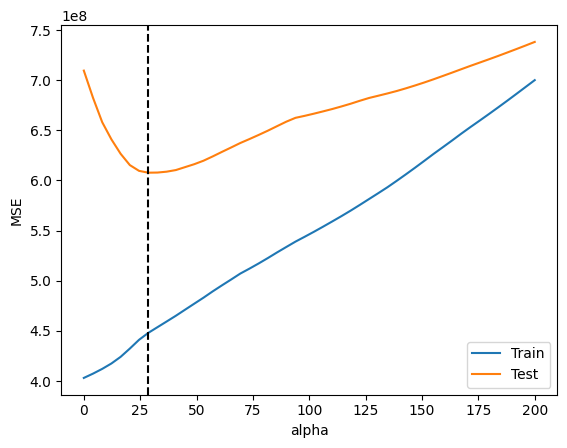

In [10]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline

train_mse = []
test_mse = []
alphas = np.linspace(0, 200, num=50)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_preprocessed, y_train)
    
    train_preds = lasso.predict(X_train_preprocessed)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_preprocessed)
    test_mse.append(mean_squared_error(y_test, test_preds))

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against `alpha`. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what `alpha` represents and how it relates to overfitting vs underfitting.

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

For `alpha` values below 28, the model is overfitting. As `alpha` increases up to 28, the MSE for the training data increases and MSE for the test data decreases, indicating that we are reducing overfitting.

For `alpha` values above 28, the model is starting to underfit. You can tell because _both_ the train and the test MSE values are increasing.

</details>

## Summary

Well done! You now know how to build lasso and ridge regression models, use them for feature selection and find an optimal value for `alpha`. 